In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('../01.Data_Collection/Theaters_merged_files/CGV%20신촌아트레온.csv')
df.head()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,좌석수
0,2015-01-01,01관,"08:00, 국제시장(디지털), 6,000원","10:40, 국제시장(디지털), 10,000원","13:20, 국제시장(디지털), 10,000원","16:00, 국제시장(디지털), 10,000원","18:40, 국제시장(디지털), 10,000원","21:20, 국제시장(디지털), 10,000원","24:00, 국제시장(디지털), 9,000원",NaN,NaN,NaN,NaN,304.000000
1,2015-01-01,02관(Premium),"08:00, 국제시장(디지털)","10:40, 국제시장(디지털)","13:10, 기술자들(디지털), 10,000원","15:40, 기술자들(디지털), 10,000원","18:05, 기술자들(디지털), 10,000원","20:35, 기술자들(디지털), 10,000원","23:05, 기술자들(디지털), 9,000원","25:30, 기술자들(디지털), 9,000원",NaN,NaN,NaN,205.000000
2,2015-01-01,03관,"07:40, 테이큰 3(디지털), 6,000원","10:05, 테이큰 3(디지털), 10,000원","12:30, 테이큰 3(디지털), 10,000원","14:55, 테이큰 3(디지털), 10,000원","17:20, 테이큰 3(디지털), 10,000원","19:45, 테이큰 3(디지털), 10,000원","22:10, 테이큰 3(디지털), 10,000원","24:35, 테이큰 3(디지털), 9,000원",NaN,NaN,NaN,205.000000
3,2015-01-01,04관(SCREENX),"07:40, 테이큰 3(디지털)","10:05, 테이큰 3(디지털)","12:30, 테이큰 3(디지털)","14:55, 테이큰 3(디지털)","17:20, 테이큰 3(디지털)","19:20, 님아, 그 강을 건너지 마오(디지털), 10,000원","21:15, 님아, 그 강을 건너지 마오(디지털), 10,000원","23:15, 님아, 그 강을 건너지 마오(디지털), 9,000원","25:10, 님아, 그 강을 건너지 마오(디지털), 9,000원",NaN,NaN,132.000000
4,2015-01-01,05관,"09:45, 님아, 그 강을 건너지 마오(디지털)","11:40, 님아, 그 강을 건너지 마오(디지털)","13:35, 님아, 그 강을 건너지 마오(디지털)","15:30, 님아, 그 강을 건너지 마오(디지털)","17:25, 님아, 그 강을 건너지 마오(디지털)","19:20, 님아, 그 강을 건너지 마오(디지털)","21:15, 님아, 그 강을 건너지 마오(디지털)","23:15, 님아, 그 강을 건너지 마오(디지털)","25:10, 님아, 그 강을 건너지 마오(디지털)",NaN,NaN,127.000000


In [4]:
len(df)

17704

In [5]:
17000 * 550

9350000

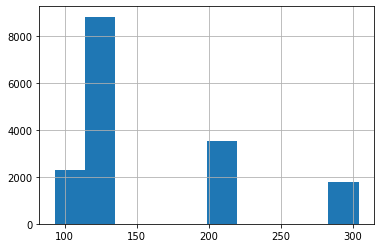

In [8]:
df['좌석수'].hist()

In [10]:
df.tail(20)

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,좌석수
17684,2019-10-30,01관,"08:30, 82년생 김지영(디지털), 7,000원","11:00, 82년생 김지영(디지털), 10,000원","14:30, 82년생 김지영(디지털), 10,000원","17:00, 82년생 김지영(디지털), 7,000원","19:25, 82년생 김지영(디지털), 10,000원","21:50, 82년생 김지영(디지털), 11,000원","24:15, 82년생 김지영(디지털), 9,000원",NaN,NaN,NaN,NaN,304.000000
17685,2019-10-30,02관(Premium),"08:10, 터미네이터: 다크 페이트(디지털), 7,000원","10:50, 터미네이터: 다크 페이트(디지털), 7,000원","15:35, 터미네이터: 다크 페이트(디지털), 10,000원","18:10, 터미네이터: 다크 페이트(디지털), 8,000원","20:45, 터미네이터: 다크 페이트(디지털), 9,000원","23:20, 터미네이터: 다크 페이트(디지털), 10,000원",NaN,NaN,NaN,NaN,NaN,205.000000
17686,2019-10-30,03관,"09:30, 날씨의 아이(디지털), 7,000원","11:50, 날씨의 아이(디지털), 5,000원","15:50, 날씨의 아이(디지털), 10,000원","18:30, 날씨의 아이(디지털), 10,000원","20:50, 날씨의 아이(디지털), 10,000원","23:10, 날씨의 아이(디지털), 10,000원","25:30, 날씨의 아이(디지털), 9,000원",NaN,NaN,NaN,NaN,205.000000
17687,2019-10-30,04관(SCREENX),"09:00, 터미네이터: 다크 페이트(디지털), 7,000원","11:40, 터미네이터: 다크 페이트(디지털), 9,000원","14:25, 터미네이터: 다크 페이트(디지털), 10,000원","17:00, 터미네이터: 다크 페이트(디지털), 8,000원","19:35, 터미네이터: 다크 페이트(디지털), 8,000원","22:10, 터미네이터: 다크 페이트(디지털), 10,000원","24:50, 터미네이터: 다크 페이트(디지털), 9,000원",NaN,NaN,NaN,NaN,132.000000
17688,2019-10-30,05관,"08:20, 프렌드 존(디지털), 7,000원","10:50, 프렌드 존(디지털), 7,000원","14:30, 프렌드 존(디지털), 9,000원","17:20, 프렌드 존(디지털), 7,000원","20:00, 프렌드 존(디지털), 9,000원","22:30, 프렌드 존(디지털), 10,000원","25:00, 프렌드 존(디지털)",NaN,NaN,NaN,NaN,127.000000
17689,2019-10-30,06관,"09:20, 82년생 김지영(디지털), 8,000원","11:50, 82년생 김지영(디지털), 10,000원","15:30, 82년생 김지영(디지털), 10,000원","18:00, 82년생 김지영(디지털), 8,000원","20:25, 82년생 김지영(디지털), 5,000원","22:50, 82년생 김지영(디지털), 10,000원","25:15, 82년생 김지영(디지털), 9,000원",NaN,NaN,NaN,NaN,108.000000
17690,2019-10-30,07관(4DX),"08:30, 날씨의 아이(디지털), 7,000원","10:50, 날씨의 아이(디지털), 7,000원","14:50, 엔젤 오브 마인(디지털), 7,000원","17:10, 날씨의 아이(디지털), 5,000원","19:50, 엔젤 오브 마인(디지털), 8,000원","22:10, 날씨의 아이(디지털), 10,000원","24:30, 엔젤 오브 마인(디지털)",NaN,NaN,NaN,NaN,127.000000
17691,2019-10-30,08관,"08:40, 조커(디지털), 7,000원","11:30, 조커(디지털), 9,000원","14:40, 조커(디지털), 10,000원","17:10, 조커(디지털), 7,000원","19:40, 조커(디지털), 9,000원","22:20, 조커(디지털), 10,000원","24:50, 조커(디지털), 9,000원",NaN,NaN,NaN,NaN,133.000000
17692,2019-10-30,09관,"08:10, 니나 내나(디지털), 7,000원","10:20, 82년생 김지영(디지털), 10,000원","14:25, 니나 내나(디지털), 5,000원","16:30, 82년생 김지영(디지털), 11,000원","18:50, 니나 내나(디지털), 5,000원","21:00, 82년생 김지영(디지털), 5,000원","23:30, 82년생 김지영(디지털), 10,000원",NaN,NaN,NaN,NaN,127.000000
17693,2019-10-30,10관 [아트하우스],"09:40, 아이다호(디지털), 7,000원","12:00, 쿠엔틴 타란티노 8(디지털), 8,000원","14:40, 스탠 바이 미(디지털), 10,000원","16:40, 아이다호(디지털), 11,000원","19:00, 모리스(디지털), 5,000원","21:50, 경계선(디지털), 11,000원","24:10, 블러드 심플(디지털), 9,000원",NaN,NaN,NaN,NaN,93.000000


In [16]:
df.loc[:, '1회':'11회'] = df.loc[:, '1회':'11회'].apply(lambda x: x.split(',')[1])

AttributeError: ("'Series' object has no attribute 'split'", 'occurred at index 1회')